# LG Aimers Session 4 - Phase 2 

- Team 동물농장 
- Final Score 0.776801점 (전체 40위/844팀 중)

# 0. Libraries 

In [ ]:
# requirements.txt에 작성된 패키지 목록을 한 번에 설치합니다
!pip install -r requirements.txt

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

import warnings
warnings.filterwarnings(action='ignore')

# SEED 고정
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

C:\Users\user\anaconda3\envs\lgaimers\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# For Preprocessing 
# nltk 라이브러리를 처음 사용할 경우, 말뭉치 자료를 따로 설치(nltk.download)해야 합니다
import nltk
import re
nltk.download('all')

import pycountry
from geotext import GeoText

# googletrans 라이브러리가 에러날 경우, googletrans==3.1.0a0 버전을 설치해야 합니다
from googletrans import Translator 
from deep_translator import GoogleTranslator

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[

[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_tree

In [3]:
# For checking GPU usage
from tensorflow.python.client import device_lib
import tensorflow as tf
print(device_lib.list_local_devices())
print(tf.config.list_physical_devices('GPU'))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3133481128119916310
xla_global_id: -1
]
[]


In [4]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = '0'                   # 여러개 사용시 '0,1,2' 식으로 하나의 문자열에 입력
gpus = tf.config.experimental.list_physical_devices('GPU') # 호스트 런타임에 표시되는 GPU 장치 목록 반환

if gpus: # 반환된 GPU 장치 목록이 있다면
    try: # 해당 장치에 대한 메모리 증가 활성화 여부 설정
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e: # try문 실패시에 에러문구 출력
        print(e)

In [5]:
# !pip freeze > requirements.txt

# 1. Preparing Dataset 

각 Train/Test 데이터셋을 전처리를 위해 아래와 같이 분할합니다. 

- Train Dataset (59299 rows × 29 columns)
    - train_y (1)
    - train_ml (17)
    - train_nlp (11)

- Test Dataset (5271 rows × 30 columns)
    - test_y (1)
    - test_ml (17)
    - test_nlp (11)

In [7]:
# original train and test data -> train, test
train = pd.read_csv('train.csv')
test = pd.read_csv('submission.csv')

train

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,/Sląskie/Poland,AS,NaN,33747,End Customer,SMB,NaN,NaN,NaN,...,LGEPL,3 months ~ 6 months,0,0,0.000026,0.028777,public facility,Others,694,False
59295,0.75,/Bogotá DC /Colombia,AS,0.040000,35420,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGECB,9 months ~ 1 year,0,0,0.000026,0.028777,public facility,NaN,39,False
59296,0.75,/Pisco/Peru,AS,0.040000,19249,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEPR,less than 3 months,0,0,0.000026,0.028777,public facility,NaN,125,False
59297,1.00,/santa cruz bolivia/Peru,AS,0.040000,40327,NaN,Enterprise,NaN,NaN,NaN,...,LGEPR,more than a year,0,0,0.000026,0.028777,public facility,NaN,134,False


In [8]:
# 0) Divide dataset to train_ml and train_nlp
Y_COLS = ['is_converted']
NLP_COLS = ['inquiry_type', 'expected_timeline',
            'product_category', 'product_subcategory', 'product_modelname', 
            'customer_position', 'customer_job', 'customer_type', 'customer_country',
            'business_area', 'business_subarea']
VER_COLS = ['id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver',
            'ver_win_ratio_per_bu', 'ver_win_rate_x', 'com_reg_ver_win_rate',
            'ver_pro', 'ver_cus', 'bant_submit', 'business_unit']
ML_COLS = list(set(train.columns) - set(Y_COLS) - set(NLP_COLS))

train_y = train[Y_COLS].copy()
train_ml = train[ML_COLS].copy()
train_nlp = train[NLP_COLS].copy()

test_y = test[['is_converted', 'id']].copy()
test_ml = test[ML_COLS].copy()
test_nlp = test.drop(ML_COLS, axis=1).drop(['is_converted', 'id'], axis=1).copy()

print(train_y.shape)
print(train_ml.shape)
print(train_nlp.shape)

print(test_y.shape)
print(test_ml.shape)
print(test_nlp.shape)

(59299, 1)
(59299, 17)
(59299, 11)
(5271, 2)
(5271, 17)
(5271, 11)


# 2. Preprocessing

1. **NLP Basic Preprocessing (59,299 X 11)** 
    - 텍스트 데이터 전체적으로 기본적인 전처리를 적용합니다
    - 결측치 처리(np.nan -> '')
    - **customer_country, expected_timeline** -> geotext 라이브러리 기반 직접 정제 
    - **inquiry_type** -> googletrans 라이브러리 기반 직접 정제
    - customer_position / customer_type / customer_job 
    - product_category / product_subcategory / product_modelname 
    - business_area / business_subarea  
---
2. **NLP Missing Value Handling** 
    - 텍스트 데이터의 피처 관계를 기반하여 결측치를 채웁니다
    - **business_area (with 'customer_idx')**
        - 40,882 -> 30,261 & 2,898 -> 2,566
---
3. **VER Missing Value Handling (59,299 X 9)** 
    - 가중치 데이터의 피처 관계를 기반하여 결측치를 채웁니다
    - **id/it/idit_strategic_ver**
        - business_unit(ID, IT) & business_area(corporate office, hotel accommodation)
        - 55855 / 58178 / 54734 -> 55670 / 58035 / 54406
        - 4678 / 5218 / 4625 -> 4678 / 5218 / 4625
    - **ver_win_ratio_per_bu**
        - business_unit(ID, IT) & business_area(12)
        - 43995 -> 33829 & 3365 -> 3037
    - **ver_win_rate_x**
        - business_area
        - 40882 -> 30261 & 2898 -> 2566 
    - fillna(0)
---
4. **NLP Further Preprocessing** 
    - 채워진 결측치와 값 빈도수 기반 텍스트 피처의 Label Encdoing을 진행합니다
    - **product_category(25) / customer_type(21) / business_area(13) / expected_timeline(8) / customer_position(28)**
        - 상위 빈도수를 차지하는 label 기준점을 잡고, 상위 label에 속하지 않으면 마지막 번호 부여  
    - **inquiry_type** 
    - **business_subarea / product_subcategory / product_modelname / customer_job / customer_country** 
        - 단순 Label Encoding 적용
---
5. **ML Basic Preprocessing (59,299 X 7)** 
    - 텍스트, 가중치 변수 외 범주형, 연속형 변수에 대해 전처리를 진행합니다
    - Numerical Variable: lead_desc_length, historical_existing_cnt
    - Categorical Variable: **response_corporate, enterprise**
---
6. **Y Label Encoding** 
    - True: 1 
    - False: 0

### 2.0. NLP Basic Preprocessing Functions 

In [9]:
# For 'customer_country'
def remove_special_characters_and_spaces(text):
    #숫자, ',' '-' 제거
    text = re.sub('[/0-9,-]', ' ', text) 
    
    #공백을 기준으로 처음엔 대문자 나머지는 소문자
    text_list = text.split(' ')
    new_text_list=[]
    for i in text_list :
        new_text_list.append(i.capitalize())
    
    #문자열 변경
    q=' '.join(new_text_list)
    q=q.replace('U.a.e','United Arab Emirates')
    q=q.replace('Vietnam','Viet Nam')
    q=q.replace('Turkey','Türkiye')
    q=q.replace('South Korea','Korea, Republic of')
    q=q.replace('Dubai', 'United Arab Emirates')
    q=q.replace('Herzegovina','Bosnia and Herzegovina')
    q=q.replace('Bolivia', 'Bolivia, Plurinational State of')
    q=q.replace('Venezuela', 'Venezuela, Bolivarian Republic of')
    q=q.replace('Russia','Russian Federation')
    q=q.replace('Dominican Republic', 'Dominican')
    
    return q

def remove_keywords(df, column, keywords):
    for keyword in keywords:
        df[column] = df[column].str.replace(r'.* ' + keyword, '', regex=True)
    return df

def text_preprocessing(text):
    countries = [(country.name, text.rindex(country.name)) for country in pycountry.countries if ' ' + country.name + ' ' in ' ' + text + ' ']
    if countries:
        countries.sort(key=lambda x: x[1], reverse=True)  
        countries = countries[0][0]  
#         print(text, '/',countries)
    if len(countries) == 0:
        country_code = list(GeoText(text).country_mentions)
#         if len(country_code) > 1: 
#             print(text, country_code)
        if len(country_code) != 0 :
            try:
                countries=list(pycountry.countries.get(alpha_2=country_code[-1]).name)
            except :
                countries=''
    return ''.join(countries)

# For 'expected_timeline'
def preprocess_timeline(df, column_name):
    #- _ 기입자마다 다르게해놔서 변경
    df[column_name] = df[column_name].str.replace('_',' ')
    df[column_name] = df[column_name].str.replace('-','~')
    df[column_name] = df[column_name].str.replace('.','')
    #6개월 이내 개수 : 108개 -> 3~6 개월로 원함으로 변경
    #5개월 이내 개수 : 2개 -> 3~6 개월 변경
    df[column_name] = df[column_name].str.replace('less than 6 months','3 months ~ 6 months')
    df[column_name] = df[column_name].str.replace('less than 5 months','3 months ~ 6 months')
    #then 으로 오타 낸거 있어서
    df[column_name] = df[column_name].str.replace('then','than')
    return df

In [10]:
# For handling translation issue 
# 만약, googletranslator가 동작하지 않으면 해당 함수(translating)를 주석 처리하고 실행하세요
def translating(df, columns):
    # detect language (except for English)
    translator = Translator()
    value_counts = pd.DataFrame(df[columns].value_counts()).reset_index( )
    value_counts['lang'] = 'en'
    
    for idx, value in enumerate(value_counts['inquiry_type']):
        langs = translator.detect(value)
        if langs.lang != 'en': 
            value_counts.loc[idx, 'lang'] = str(langs.lang)
    print("translated values: ", len(value_counts[value_counts.lang != 'en']))

    # translate text 
    value_counts['translated'] = ' '
    for idx, lang in enumerate(value_counts['lang']):
        if lang != 'en': 
            text = value_counts.loc[idx, 'inquiry_type']
            googleTranslator = GoogleTranslator(source=lang, target='en')
            value_counts.loc[idx, 'translated'] = googleTranslator.translate(text)

    vc_translated = value_counts[value_counts.lang != 'en']
    dict_translated = dict([(i,x) for i, x in zip(vc_translated['inquiry_type'], vc_translated.translated)])
    df = df.replace({columns:dict_translated})

    return df

def preprocessing_inquiry_type(df, columns):
    # End-Customer -> End Customer (대시(-, _) 이어진 단어 한단어화)
    df[columns] = df[columns].str.replace('-', ' ')
    df[columns] = df[columns].str.replace('_', ' ')
    
    df[columns] = df[columns].str.lower()
    df[columns] = df[columns].str.strip()

    # user = customer, 기타 등등(others, etc) -> other 
    df[columns] = df[columns].str.replace('others', 'other')
    df[columns] = df[columns].str.replace('other.', 'other')
    df[columns] = df[columns].str.replace('etc', 'other')
    
    return df 

def preprocessing_customer(df, columns):
    # End-Customer -> End Customer (대시(-, _) 이어진 단어 한단어화)
    df[columns] = df[columns].apply(lambda x: x.str.lower())
    df[columns] = df[columns].apply(lambda x: x.str.replace('-', ' '))
    df[columns] = df[columns].apply(lambda x: x.str.replace('none', ''))
    df[columns] = df[columns].apply(lambda x: x.str.strip())

    # split 
    for col in columns:
        df = df.join(df[col].str.split('[(/&,]', expand=True).add_prefix(str(col)+'_'))
        expanded_columns = [c for c in df if c.startswith(col)]
        df[expanded_columns] =  df[expanded_columns].replace(np.nan, '', regex=True)
        df[expanded_columns] =  df[expanded_columns].apply(lambda x: x.str.strip())
        print(col, " -> ", df.shape)
    df[columns] =  df[columns].apply(lambda x: x.str.replace(')', ''))

    # concat
    for col in columns:
        expanded_columns = [c for c in df if c.startswith(col)]
        expanded_columns.remove(col)
        df[col] = df[expanded_columns].apply(lambda row: ' '.join(row.astype(str)), axis=1)
        df = df.drop(expanded_columns, axis=1)

    df[columns] = df[columns].apply(lambda x: x.str.strip())
    df[columns] = df[columns].apply(lambda x: x.str.replace('others', 'other'))
    df[columns] = df[columns].apply(lambda x: x.str.replace('etc.', 'other'))
    df[columns] = df[columns].apply(lambda x: x.str.replace('etc', 'other'))
    df[columns] = df[columns].apply(lambda x: x.str.replace('end customer', 'end user'))
    
    return df

# Also for business variables 
def preprocessing_product(df, columns): 
    # End-Customer -> End Customer (대시(-, _) 이어진 단어 한단어화)
    df[columns] = df[columns].apply(lambda x: x.str.lower())
    df[columns] = df[columns].apply(lambda x: x.str.replace('-', ' '))
    df[columns] = df[columns].apply(lambda x: x.str.replace('none', ''))
    df[columns] = df[columns].apply(lambda x: x.str.strip())

    # split 
    for col in columns:
        df = df.join(df[col].str.split('[(/&,]', expand=True).add_prefix(str(col)+'_'))
        expanded_columns = [c for c in df if c.startswith(col)]
        df[expanded_columns] =  df[expanded_columns].replace(np.nan, '', regex=True)
        df[expanded_columns] =  df[expanded_columns].apply(lambda x: x.str.strip())
        print(col, " -> ", df.shape)
    
    # concat
    for col in columns:
        expanded_columns = [c for c in df if c.startswith(col)]
        expanded_columns.remove(col)
        df[col] = df[expanded_columns].apply(lambda row: ' '.join(row.astype(str)), axis=1)
        df = df.drop(expanded_columns, axis=1)
        
    df[columns] = df[columns].apply(lambda x: x.str.strip())
    df[columns] = df[columns].apply(lambda x: x.str.replace(')', ''))
    df[columns] = df[columns].apply(lambda x: x.str.replace('others', 'other'))
    df[columns] = df[columns].apply(lambda x: x.str.replace('etc.', 'other'))
    df[columns] = df[columns].apply(lambda x: x.str.replace('etc', 'other'))
    
    return df

### 2.1. NLP Basic Preprocessing

텍스트 데이터 전체적으로 기본적인 전처리를 적용합니다.

In [11]:
# Split and Copy dataset
processed_train_nlp1 = train_nlp.copy()
processed_test_nlp1 = test_nlp.copy()

# Hanlding Missing Values -> ''처리
processed_train_nlp1 = processed_train_nlp1.replace(np.nan, '', regex=True)
processed_train_nlp1 = processed_train_nlp1.apply(lambda x: x.str.replace('none', ' '))

processed_test_nlp1 = processed_test_nlp1.replace(np.nan, '', regex=True)
processed_test_nlp1 = processed_test_nlp1.apply(lambda x: x.str.replace('none', ' '))

In [12]:
# Customer Country
KEYWORDS = ['City', 'Park', 'University', 'Street']

processed_train_nlp1['customer_country'] = processed_train_nlp1['customer_country'].apply(remove_special_characters_and_spaces)
processed_train_nlp1 = remove_keywords(processed_train_nlp1, 'customer_country', KEYWORDS)
processed_train_nlp1['customer_country'] = processed_train_nlp1['customer_country'].apply(text_preprocessing)

processed_test_nlp1['customer_country'] = processed_test_nlp1['customer_country'].apply(remove_special_characters_and_spaces)
processed_test_nlp1 = remove_keywords(processed_test_nlp1, 'customer_country', KEYWORDS)
processed_test_nlp1['customer_country'] = processed_test_nlp1['customer_country'].apply(text_preprocessing)

In [13]:
# Expected Timeline 
processed_train_nlp1 = preprocess_timeline(processed_train_nlp1, 'expected_timeline')
processed_test_nlp1 = preprocess_timeline(processed_test_nlp1, 'expected_timeline')

In [14]:
# Inqury Type 
processed_train_nlp1 = translating(processed_train_nlp1, 'inquiry_type')
processed_train_nlp1 = preprocessing_inquiry_type(processed_train_nlp1, 'inquiry_type')

processed_test_nlp1 = translating(processed_test_nlp1, 'inquiry_type')
processed_test_nlp1 = preprocessing_inquiry_type(processed_test_nlp1, 'inquiry_type')

# Customer Position/Type/Job
CUSTOMER_COLUMNS = ['customer_position', 'customer_type', 'customer_job']
processed_train_nlp1 = preprocessing_customer(processed_train_nlp1, CUSTOMER_COLUMNS)
processed_test_nlp1 = preprocessing_customer(processed_test_nlp1, CUSTOMER_COLUMNS)

# Product Category/SubCategory/ModelName
PRODUCT_COLUMNS = ['product_category', 'product_subcategory', 'product_modelname']
processed_train_nlp1 = preprocessing_product(processed_train_nlp1, PRODUCT_COLUMNS)
processed_test_nlp1 = preprocessing_product(processed_test_nlp1, PRODUCT_COLUMNS)

# Business Area/SubArea
BUSINESS_COLUMNS = ['business_area', 'business_subarea']
processed_train_nlp1 = preprocessing_product(processed_train_nlp1, BUSINESS_COLUMNS)
processed_test_nlp1 = preprocessing_product(processed_test_nlp1, BUSINESS_COLUMNS)

translated values:  0
translated values:  0
customer_position  ->  (59299, 17)
customer_type  ->  (59299, 19)
customer_job  ->  (59299, 23)
customer_position  ->  (5271, 17)
customer_type  ->  (5271, 19)
customer_job  ->  (5271, 21)
product_category  ->  (59299, 25)
product_subcategory  ->  (59299, 27)
product_modelname  ->  (59299, 30)
product_category  ->  (5271, 12)
product_subcategory  ->  (5271, 20)
product_modelname  ->  (5271, 24)
business_area  ->  (59299, 13)
business_subarea  ->  (59299, 16)
business_area  ->  (5271, 13)
business_subarea  ->  (5271, 16)


In [15]:
# NLP_COLS의 결측치는 모두 공란('')으로 치환하였기 때문에
# 결측치 확인은 아래와 같이 진행합니다(원본 train 데이터와 결측치 변화 양상 X)
for col in NLP_COLS:
    empty_data = len(processed_train_nlp1[processed_train_nlp1[col] == ''][col])
    print("[train] ", col, " -> ", empty_data)
    empty_data = len(processed_test_nlp1[processed_test_nlp1[col] == ''][col])
    print("[test]  ", col, " -> ", empty_data)

[train]  inquiry_type  ->  941
[test]   inquiry_type  ->  1292
[train]  expected_timeline  ->  30863
[test]   expected_timeline  ->  2408
[train]  product_category  ->  19374
[test]   product_category  ->  1858
[train]  product_subcategory  ->  50064
[test]   product_subcategory  ->  4478
[train]  product_modelname  ->  50070
[test]   product_modelname  ->  4709
[train]  customer_position  ->  19680
[test]   customer_position  ->  1957
[train]  customer_job  ->  18733
[test]   customer_job  ->  1439
[train]  customer_type  ->  43961
[test]   customer_type  ->  1457
[train]  customer_country  ->  2461
[test]   customer_country  ->  195
[train]  business_area  ->  40882
[test]   business_area  ->  2898
[train]  business_subarea  ->  53773
[test]   business_subarea  ->  3455


### 2.2. NLP Missing Value Handling 

텍스트 데이터의 피처 관계를 기반하여 결측치를 채웁니다.

- business_area 
    - customer_idx를 기반으로 결측치 처리 
    - customer_idx 중 상위 5개의 idx에 대해 전처리 진행 
    - 하나의 customer_idx 데이터에 대해 가장 빈도수가 높은 business_area값을 이용
    - 같은 customer_idx 중 business_area가 비어져 있을 경우 가장 빈도수가 높은 business_area로 채움

In [16]:
# Split and Copy dataset
processed_train_nlp2 = pd.concat([processed_train_nlp1, train_ml['customer_idx']], axis=1)
processed_test_nlp2 = pd.concat([processed_test_nlp1, test_ml['customer_idx']], axis=1)

In [17]:
# [Train] Business Area with Customer Idx (40,882 -> 30,261) 
top_cusIdx = list(processed_train_nlp2['customer_idx'].value_counts().head().index)
for cusidx in top_cusIdx:
    cusList = list(processed_train_nlp2[processed_train_nlp2['customer_idx']==cusidx]['business_area'].value_counts().index)
    if '' in cusList: cusList.remove('')
    if len(cusList) == 0:
        continue
    else:
        freq_buArea = cusList[0]
    processed_train_nlp2.loc[(processed_train_nlp2['customer_idx']==cusidx) & (processed_train_nlp2['business_area']==''), 'business_area'] = freq_buArea
    print(train[(train['customer_idx']==cusidx)]['business_area'].value_counts()[0], " -> ", processed_train_nlp2[(processed_train_nlp2['customer_idx']==cusidx)]['business_area'].value_counts()[0])
print("[train] ", len(processed_train_nlp1[processed_train_nlp1['business_area'] == '']['business_area']), " -> ", len(processed_train_nlp2[processed_train_nlp2['business_area'] == '']['business_area']))
    
# [Test] Business Area with Customer Idx (2,898 -> 2,566)  
top_cusIdx = list(processed_test_nlp2['customer_idx'].value_counts().head().index)
for cusidx in top_cusIdx:
    cusList = list(processed_test_nlp2[processed_test_nlp2['customer_idx']==cusidx]['business_area'].value_counts().index)
    if '' in cusList: cusList.remove('')
    if len(cusList) == 0:
        continue
    else:
        freq_buArea = cusList[0]
    processed_test_nlp2.loc[(processed_test_nlp2['customer_idx']==cusidx) & (processed_test_nlp2['business_area']==''), 'business_area'] = freq_buArea
    print(test[(test['customer_idx']==cusidx)]['business_area'].value_counts()[0], " -> ", processed_test_nlp2[(processed_test_nlp2['customer_idx']==cusidx)]['business_area'].value_counts()[0])
print("[test]  ", len(processed_test_nlp1[processed_test_nlp1['business_area'] == '']['business_area']), " -> ", len(processed_test_nlp2[processed_test_nlp2['business_area'] == '']['business_area']))

86  ->  7561
11  ->  2390
15  ->  348
5  ->  330
10  ->  119
[train]  40882  ->  30261
9  ->  341
114  ->  114
14  ->  14
[test]   2898  ->  2566


In [18]:
# Remove helper column
processed_train_nlp2 = processed_train_nlp2.drop(['customer_idx'], axis=1)
processed_test_nlp2 = processed_test_nlp2.drop(['customer_idx'], axis=1)

### 2.3. VER Missing Value Handling 

가중치 데이터의 피처 관계를 기반하여 결측치를 채웁니다. 

- ID/IT/IDIT_strategic_ver
    - business_unit의 특정 사업부(ID, IT) 여부 
    - 동시에 business_area의 특정 사업 영역(corporate office, hotel accommodation) 여부 
- ver_win_ratio_per_bu 
    - business_unit의 특정 사업부(ID, IT) 여부 
    - 동시에 business_area의 특정 사업 영역(12개) 여부
    - 특정 사업 영역은 groupby 기능을 통해 ratio 값 추출
- ver_win_rate_x
    - business_area별 rate 값을 groupby 기능을 통해 추출

In [19]:
# Split and Copy dataset
processed_train_ver1 = pd.concat([train_ml[VER_COLS], processed_train_nlp2], axis=1).copy()
processed_test_ver1 = pd.concat([test_ml[VER_COLS], processed_test_nlp2], axis=1).copy()

In [20]:
# For Train Data
# ID/IT/IDIT Strategic Ver 
processed_train_ver1.loc[(processed_train_ver1['business_unit']=='ID') & (processed_train_ver1['business_area'].isin(['corporate office','hotel accommodation'])),'id_strategic_ver'] = 1
processed_train_ver1.loc[(processed_train_ver1['business_unit']=='IT') & (processed_train_ver1['business_area'].isin(['corporate office','hotel accommodation'])),'it_strategic_ver'] = 1
processed_train_ver1.loc[(processed_train_ver1['id_strategic_ver']==1) | (processed_train_ver1['it_strategic_ver']==1), 'idit_strategic_ver'] = 1
print("id_strategic_ver: ", train.id_strategic_ver.isna().sum(), " -> ", processed_train_ver1.id_strategic_ver.isna().sum())
print("it_strategic_ver: ", train.it_strategic_ver.isna().sum(), " -> ", processed_train_ver1.it_strategic_ver.isna().sum())
print("idit_strategic_ver: ", train.idit_strategic_ver.isna().sum(), " -> ", processed_train_ver1.idit_strategic_ver.isna().sum())

# Ver Win Ratio Per Bu 
# business_unit = 'ID'
df = processed_train_ver1[['business_unit', 'business_area', 'ver_win_ratio_per_bu']].copy()
df = df[df['business_unit']=='ID'][['business_area', 'ver_win_ratio_per_bu']]
mulidx = df.groupby('ver_win_ratio_per_bu').value_counts().index
for ratio, area in mulidx:
    processed_train_ver1.loc[(processed_train_ver1['business_unit']=='ID') & (processed_train_ver1['business_area']==area), 'ver_win_ratio_per_bu'] = ratio
# business_unit = 'AS'
df = processed_train_ver1[['business_unit', 'business_area', 'ver_win_ratio_per_bu']].copy()
df = df[df['business_unit']=='AS'][['business_area', 'ver_win_ratio_per_bu']]
mulidx = df.groupby('ver_win_ratio_per_bu').value_counts().index
for ratio, area in mulidx:
    processed_train_ver1.loc[(processed_train_ver1['business_unit']=='AS') & (processed_train_ver1['business_area']==area), 'ver_win_ratio_per_bu'] = ratio
print("ver_win_ratio_per_bu: ", train.ver_win_ratio_per_bu.isna().sum(), " -> ", processed_train_ver1.ver_win_ratio_per_bu.isna().sum())
    
# Ver Win Rate X 
mulidx = processed_train_ver1[['business_area', 'ver_win_rate_x']].groupby('ver_win_rate_x').value_counts().index
for rate, area in mulidx:
    processed_train_ver1.loc[processed_train_ver1['business_area']==area, 'ver_win_rate_x'] = rate
print("ver_win_rate_x: ", train.ver_win_rate_x.isna().sum(), " -> ", processed_train_ver1.ver_win_rate_x.isna().sum())

id_strategic_ver:  55855  ->  55670
it_strategic_ver:  58178  ->  58035
idit_strategic_ver:  54734  ->  54406
ver_win_ratio_per_bu:  43995  ->  33829
ver_win_rate_x:  40882  ->  30261


In [21]:
# For Test Data
# ID/IT/IDIT Strategic Ver 
processed_test_ver1.loc[(processed_test_ver1['business_unit']=='ID') & (processed_test_ver1['business_area'].isin(['corporate office','hotel accommodation'])),'id_strategic_ver'] = 1
processed_test_ver1.loc[(processed_test_ver1['business_unit']=='IT') & (processed_test_ver1['business_area'].isin(['corporate office','hotel accommodation'])),'it_strategic_ver'] = 1
processed_test_ver1.loc[(processed_test_ver1['id_strategic_ver']==1) | (processed_test_ver1['it_strategic_ver']==1), 'idit_strategic_ver'] = 1
print("id_strategic_ver: ", test.id_strategic_ver.isna().sum(), " -> ", processed_test_ver1.id_strategic_ver.isna().sum())
print("it_strategic_ver: ", test.it_strategic_ver.isna().sum(), " -> ", processed_test_ver1.it_strategic_ver.isna().sum())
print("idit_strategic_ver: ", test.idit_strategic_ver.isna().sum(), " -> ", processed_test_ver1.idit_strategic_ver.isna().sum())

# Ver Win Ratio Per Bu 
# business_unit = 'ID'
df = processed_test_ver1[['business_unit', 'business_area', 'ver_win_ratio_per_bu']].copy()
df = df[df['business_unit']=='ID'][['business_area', 'ver_win_ratio_per_bu']]
mulidx = df.groupby('ver_win_ratio_per_bu').value_counts().index
for ratio, area in mulidx:
    processed_test_ver1.loc[(processed_test_ver1['business_unit']=='ID') & (processed_test_ver1['business_area']==area), 'ver_win_ratio_per_bu'] = ratio
# business_unit = 'AS'
df = processed_test_ver1[['business_unit', 'business_area', 'ver_win_ratio_per_bu']].copy()
df = df[df['business_unit']=='AS'][['business_area', 'ver_win_ratio_per_bu']]
mulidx = df.groupby('ver_win_ratio_per_bu').value_counts().index
for ratio, area in mulidx:
    processed_test_ver1.loc[(processed_test_ver1['business_unit']=='AS') & (processed_test_ver1['business_area']==area), 'ver_win_ratio_per_bu'] = ratio
print("ver_win_ratio_per_bu: ", test.ver_win_ratio_per_bu.isna().sum(), " -> ", processed_test_ver1.ver_win_ratio_per_bu.isna().sum())
    
# Ver Win Rate X 
mulidx = processed_test_ver1[['business_area', 'ver_win_rate_x']].groupby('ver_win_rate_x').value_counts().index
for rate, area in mulidx:
    processed_test_ver1.loc[processed_test_ver1['business_area']==area, 'ver_win_rate_x'] = rate
print("ver_win_rate_x: ", test.ver_win_rate_x.isna().sum(), " -> ", processed_test_ver1.ver_win_rate_x.isna().sum())

id_strategic_ver:  4678  ->  4678
it_strategic_ver:  5218  ->  5218
idit_strategic_ver:  4625  ->  4625
ver_win_ratio_per_bu:  3365  ->  3037
ver_win_rate_x:  2898  ->  2566


In [22]:
# Handling Missing Values for VER Cols 
# 가중치 데이터들의 남은 결측치에 대해 0으로 채웁니다
dfs = [processed_train_ver1, processed_test_ver1]
for df in dfs:
    isna_cols = df.columns[df.isna().sum() != 0]
    for col in isna_cols:
        print(col, " -> ", df[col].isna().sum(), end=' ')
        df[col] = df[col].fillna(0) # configuration, 결측치로 채울 값을 여기서 수정하세요
        print(df[col].isna().sum())

id_strategic_ver  ->  55670 0
it_strategic_ver  ->  58035 0
idit_strategic_ver  ->  54406 0
ver_win_ratio_per_bu  ->  33829 0
ver_win_rate_x  ->  30261 0
com_reg_ver_win_rate  ->  44731 0
id_strategic_ver  ->  4678 0
it_strategic_ver  ->  5218 0
idit_strategic_ver  ->  4625 0
ver_win_ratio_per_bu  ->  3037 0
ver_win_rate_x  ->  2566 0
com_reg_ver_win_rate  ->  3483 0


In [23]:
# Business Unit : Label Encoding
# business_unit은 여기서 미리 label encoding 실시
LE_BU = LabelEncoder()
processed_train_ver1['business_unit'] = LE_BU.fit_transform(processed_train_ver1['business_unit'])
for label in processed_test_ver1['business_unit'].unique():
    if label not in LE_BU.classes_:
        LE_BU.classes_ = np.append(LE_BU.classes_, label)
processed_test_ver1['business_unit'] = LE_BU.transform(processed_test_ver1['business_unit'])

In [24]:
# Remove helper column
processed_train_ver1 = processed_train_ver1.drop(processed_train_nlp2.columns, axis=1)
processed_test_ver1 = processed_test_ver1.drop(processed_test_nlp2.columns, axis=1)

### 2.4. NLP Further Preprocessing 

채워진 결측치와 값 빈도수 기반 텍스트 피처의 Label Encdoing을 진행합니다. 
- product_category(25) / customer_type(21) / business_area(13) / expected_timeline(8) / customer_position(28)
    - value_counts() 기반 가장 빈도수가 높은 상위 label 개수를 정하고, 상위 label에 속하지 않으면 마지막 번호 부여
    - 상위 label 개수는 train data의 value_counts() 기준 100개 미만은 모두 같은 label로 속하도록 기준 적용 
    - 만약, train data에는 없지만 test data에는 있는 label을 만날 경우, label 번호를 추가하여 적용 
- inquiry_type 
    - train data 기반 수제 전처리 적용 (process_sentences)
- business_subarea / product_subcategory / product_modelname / customer_job / customer_country 
    - 기준점을 잡기 모호할 정도로 label이 많은 변수 
    - 단순 Label Encoding 적용

In [25]:
# Split and Copy dataset
processed_train_nlp3 = pd.concat([processed_train_ver1, processed_train_nlp2], axis=1).copy()
processed_test_nlp3 = pd.concat([processed_test_ver1, processed_test_nlp2], axis=1).copy()

In [26]:
# For Train Data
# Product Category : 25개의 상위 category에 대해서만 0~24번까지 label encdoing 후, 나머지 단어에 대해 25번 label encoding 
df = processed_train_nlp3[['ver_pro', 'product_category']].groupby('product_category').value_counts().unstack()
list_productCat = df[df[1].isna()==False].sort_values(1, ascending=False).index
dict_productCat = {string : i for i, string in enumerate(list_productCat)}
processed_train_nlp3['product_category'] = processed_train_nlp3['product_category'].map(dict_productCat)
processed_train_nlp3['product_category'] = processed_train_nlp3['product_category'].fillna(25) # 나머지 단어들에 대해 25번 부여
print(processed_train_nlp3['product_category'].value_counts().head())

# Customer Type : 0번은 end user, 그 외 value에 대해 순서 상 마지막 단어 (solution eco partner -> partner)로 변환, 이후 21개에 대해 label encoding
processed_train_nlp3['customer_type'] = processed_train_nlp3['customer_type'].str.split(' ').str[-1]
processed_train_nlp3['customer_type'] = processed_train_nlp3['customer_type'].apply(lambda x: x.replace('user', 'end user'))
df = processed_train_nlp3[['ver_pro', 'customer_type']].groupby('customer_type').value_counts().unstack()
list_cusType = df.sort_values(1, ascending=False).index
dict_cusType = {string : i for i, string in enumerate(list_cusType)}
processed_train_nlp3['customer_type'] = processed_train_nlp3['customer_type'].map(dict_cusType)
print(processed_train_nlp3['customer_type'].value_counts().head())

# Business Area : 13개의 category에 대해 label encoding 
list_buArea = processed_train_nlp3.business_area.value_counts().index
dict_buArea = {string : i for i, string in enumerate(list_buArea)}
processed_train_nlp3['business_area'] = processed_train_nlp3['business_area'].map(dict_buArea)
print(processed_train_nlp3['business_area'].value_counts().head())

25.0    49177
0.0      2029
1.0      1895
2.0      1862
3.0      1350
Name: product_category, dtype: int64
0    43961
1    10652
3     2568
2     1863
9       52
Name: customer_type, dtype: int64
0    30261
1     9293
2     5723
3     4422
4     2122
Name: business_area, dtype: int64


In [27]:
# For Test Data
# Product Category : 25개의 상위 category에 대해서만 0~24번까지 label encdoing 후, 나머지 단어에 대해 25번 label encoding 
processed_test_nlp3['product_category'] = processed_test_nlp3['product_category'].map(dict_productCat)
processed_test_nlp3['product_category'] = processed_test_nlp3['product_category'].fillna(25) # 나머지 단어들에 대해 25번 부여
print(processed_test_nlp3['product_category'].value_counts())

# Customer Type : 0번은 end user, 그 외 value에 대해 순서 상 마지막 단어 (solution eco partner -> partner)로 변환, 이후 21개에 대해 label encoding
processed_test_nlp3['customer_type'] = processed_test_nlp3['customer_type'].str.split(' ').str[-1]
processed_test_nlp3['customer_type'] = processed_test_nlp3['customer_type'].apply(lambda x: x.replace('user', 'end user'))
processed_test_nlp3['customer_type'] = processed_test_nlp3['customer_type'].map(dict_cusType)
print(processed_test_nlp3['customer_type'].value_counts())

# Business Area : 13개의 category에 대해 label encoding 
processed_test_nlp3['business_area'] = processed_test_nlp3['business_area'].map(dict_buArea)
print(processed_test_nlp3['business_area'].value_counts())

25.0    4009
2.0      400
1.0      289
0.0      167
5.0      134
4.0      118
3.0      104
6.0       40
7.0        9
8.0        1
Name: product_category, dtype: int64
1     2454
0     1457
3      788
2      571
12       1
Name: customer_type, dtype: int64
0     2566
2      650
3      581
11     431
6      312
4      177
7      133
1      124
5       93
8       77
10      48
9       48
12      31
Name: business_area, dtype: int64


In [28]:
# For Train Data
# Expected Timeline: 상위 8개의 단어에 대해서만 0~7 label encoding 후, 나머지 단어들에 대해 8번 부여 
list_timeLine = processed_train_nlp3.expected_timeline.value_counts().head(8).index
dict_timeLine = {string : i for i, string in enumerate(list_timeLine)}
processed_train_nlp3['expected_timeline'] = processed_train_nlp3['expected_timeline'].map(dict_timeLine)
processed_train_nlp3['expected_timeline'] = processed_train_nlp3['expected_timeline'].fillna(8) # 나머지 단어들에 대해 25번 부여
print(processed_train_nlp3['expected_timeline'].value_counts().head())

# Customer Position: 상위 28개의 단어에 대해서만 0~27 label encoding 후, 나머지 단어들에 대해 28번 부여 
list_cusPos = processed_train_nlp3.customer_position.value_counts().head(28).index
dict_cusPos = {string : i for i, string in enumerate(list_cusPos)}
processed_train_nlp3['customer_position'] = processed_train_nlp3['customer_position'].map(dict_cusPos)
processed_train_nlp3['customer_position'] = processed_train_nlp3['customer_position'].fillna(28) # 나머지 단어들에 대해 25번 부여
print(processed_train_nlp3['customer_position'].value_counts().head())

0.0    30863
1.0    17326
2.0     5145
3.0     3027
4.0     1108
Name: expected_timeline, dtype: int64
0.0    19680
1.0     8217
2.0     7984
3.0     7463
4.0     4843
Name: customer_position, dtype: int64


In [29]:
# For Test Data
# Expected Timeline: 상위 8개의 단어에 대해서만 0~7 label encoding 후, 나머지 단어들에 대해 8번 부여 
processed_test_nlp3['expected_timeline'] = processed_test_nlp3['expected_timeline'].map(dict_timeLine)
processed_test_nlp3['expected_timeline'] = processed_test_nlp3['expected_timeline'].fillna(8) # 나머지 단어들에 대해 25번 부여
print(processed_test_nlp3['expected_timeline'].value_counts())

# Customer Position: 상위 28개의 단어에 대해서만 0~27 label encoding 후, 나머지 단어들에 대해 28번 부여 
processed_test_nlp3['customer_position'] = processed_test_nlp3['customer_position'].map(dict_cusPos)
processed_test_nlp3['customer_position'] = processed_test_nlp3['customer_position'].fillna(28) # 나머지 단어들에 대해 28번 부여
print(processed_test_nlp3['customer_position'].value_counts())

0    2408
1    1734
2     426
3     272
4     264
5     167
Name: expected_timeline, dtype: int64
0.0     1957
1.0      726
3.0      664
2.0      593
4.0      343
5.0      279
7.0      225
6.0      224
8.0       85
11.0      60
10.0      54
9.0       49
28.0      12
Name: customer_position, dtype: int64


In [30]:
# Inquiry Type: 수제 전처리 
def process_sentences(sentences):
    processed_sentences = []
    for sentence in sentences:
        if 'purchas' in sentence or 'quot' in sentence:
            processed_sentence = sentence.replace(sentence, 'purchase')
        elif 'sales' in sentence or 'pric' in sentence:
            processed_sentence = sentence.replace(sentence, 'price')
        # 'abc', 'apc', 'abd'가 있는 경우 'abcde'로 대체
        elif any(substring in sentence for substring in ['product', 'detail', 'info']):
            processed_sentence = sentence.replace(sentence, 'product')
        elif any(substring in sentence for substring in ['usage', 'use', 'technic']):
            processed_sentence = sentence.replace(sentence, 'technical')
        elif 'other' in sentence:
            processed_sentence = sentence.replace(sentence, 'other')
        elif 'train' in sentence:
            processed_sentence = sentence.replace(sentence, 'train')
        elif 'service' in sentence:
            processed_sentence = sentence.replace(sentence, 'service')
        elif 'partner' in sentence:
            processed_sentence = sentence.replace(sentence, 'partnership')
        elif 'demo' in sentence:
            processed_sentence = sentence.replace(sentence, 'demo')
        elif 'distribut' in sentence:
            processed_sentence = sentence.replace(sentence, 'distributorship')
        elif 'suggest' in sentence:
            processed_sentence = sentence.replace(sentence, 'suggest')
        elif 'idb' in sentence:
            processed_sentence = sentence.replace(sentence, 'idb')
        elif 'event' in sentence:
            processed_sentence = sentence.replace(sentence, 'event')
        elif 'oem' in sentence or 'odm' in sentence:
            processed_sentence = sentence.replace(sentence, 'manufacture')
        elif 'school' in sentence or 'teach' in sentence:
            processed_sentence = sentence.replace(sentence, 'school')
        else:
            # 대체할 문자열이 없는 경우 'product'으로 변환
            processed_sentence = sentence.replace(sentence, 'product')

        processed_sentences.append(processed_sentence)

    return processed_sentences

In [31]:
# Inquiry Type: 수제 전처리 
processed_train_nlp3['inquiry_type'] = process_sentences(processed_train_nlp3['inquiry_type'])
processed_test_nlp3['inquiry_type'] = process_sentences(processed_test_nlp3['inquiry_type'])

In [32]:
# Business SubArea, Product SubCategory, Product ModelName, Customer Job, Customer Country: 단순 Label Encoding
LABEL_COLS = ['inquiry_type', 'business_subarea', 'product_subcategory', 'product_modelname', 'customer_job', 'customer_country']
LE_IT = LabelEncoder() # inquiry_type에 대해 수제 전처리 진행 후, 따로 label encoding을 해주어야 함
LE_BS = LabelEncoder()
LE_PS = LabelEncoder()
LE_PM = LabelEncoder()
LE_CJ = LabelEncoder()
LE_CC = LabelEncoder()

ENCODERS = [LE_IT, LE_BS, LE_PS, LE_PM, LE_CJ, LE_CC]

# For Train
for col, le in zip(LABEL_COLS, ENCODERS):
    processed_train_nlp3[col] = le.fit_transform(processed_train_nlp3[col])
    print(le.classes_)

# For Test
for col, le in zip(LABEL_COLS, ENCODERS):
    for label in processed_test_nlp3[col].unique():
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    processed_test_nlp3[col] = le.transform(processed_test_nlp3[col])

['demo' 'distributorship' 'event' 'idb' 'manufacture' 'other'
 'partnership' 'price' 'product' 'purchase' 'school' 'service' 'suggest'
 'technical' 'train']
['' 'advertising' 'aerospace' 'agriculture' 'airline'
 'airport airfield helipad' 'apartment' 'banking' 'bookstore'
 'botanical garden green house' 'broadcasting media' 'bus terminal'
 'car dealership' 'casino resort' 'chemical factory plant'
 'cinema theater' 'clinic' 'construction' 'consulting' 'cosmetics'
 'cruise' 'cvs convenience store' 'developer property'
 'distribution center' 'dormitory' 'duty free shop' 'electronics telco'
 'energy' 'energy storage saving' 'engineering' 'entertainment'
 'exhibition convention center' 'f b food and beverage' 'fashion'
 'finance' 'fitness' 'gas station' 'general government office'
 'general hospital' 'healthcare' 'higher education college university'
 'holdings' 'hospital' 'hotel' 'hyper market grocery' 'institute academy'
 'insurance' 'investment' 'it software' 'k12 kindergarten schools'
 

In [33]:
# Remove helper column
processed_train_nlp3 = processed_train_nlp3.drop(processed_train_ver1.columns, axis=1)
processed_test_nlp3 = processed_test_nlp3.drop(processed_test_ver1.columns, axis=1)

### 2.5. ML Basic Preprocessing

텍스트, 가중치 변수 외 범주형, 연속형 변수에 대해 전처리를 진행합니다. 
- scaling을 적용한 결과가 더 좋지 않았기 때문에 적용하지 않고
- 범주형 변수에 대한 label encoding만 진행

In [34]:
# Split and Copy dataset
processed_train_ml = train_ml.copy()
processed_test_ml = test_ml.copy()

processed_train_ml = processed_train_ml.drop(VER_COLS, axis=1)
processed_test_ml = processed_test_ml.drop(VER_COLS, axis=1)

In [35]:
# 1) Drop unnecessary columns with DROP COLS
DROP_COLS = ['customer_country.1'] # configuration, 불필요한 column은 여기서 추가하세요
processed_train_ml = processed_train_ml.drop(DROP_COLS, axis=1)
processed_test_ml = processed_test_ml.drop(DROP_COLS, axis=1)

# 2) Label encoding with Categorical Variables 
CAT_COLS = ['response_corporate', 'enterprise'] # configuration, LabelEncoding할 범주형 column은 여기서 추가하세요 
LE_RC = LabelEncoder()
LE_EP = LabelEncoder()
encoders = [LE_RC, LE_EP]
for le, col in zip(encoders, CAT_COLS):
    processed_train_ml[col] = le.fit_transform(processed_train_ml[col])
    for label in processed_test_ml[col].unique():
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    processed_test_ml[col] = le.transform(processed_test_ml[col])

In [36]:
processed_train_ml.head()

,customer_idx,historical_existing_cnt,enterprise,response_corporate,lead_owner,lead_desc_length
0,32160,NaN,0,33,0,62
1,23122,12.0,0,33,1,96
2,1755,144.0,0,21,2,56
3,4919,NaN,0,21,3,44
4,17126,NaN,0,21,4,97


### 2.6. Y Label Encoding

In [37]:
y_input_data = train_y.replace({True: 1, False: 0})
y_test = test_y.replace({True: 1, False:0})

y_test.head()

,is_converted,id
0,1,19844
1,1,9738
2,0,8491
3,0,19895
4,0,10465


# 3. Data Split

전처리를 완료한 Train/Test 데이터셋을 아래와 같이 분할합니다.  
Train/Validation 데이터는 모델 학습에 쓰이며, Test 데이터는 submission 제출에 쓰입니다.  

- X_input_data (59299 rows × 27 columns)
    - X_train (54555 rows × 27 columns)
    - X_val (4744 rows × 27 columns) 
- X_test (5271 rows x 27 columns 

In [38]:
X_input_data = pd.concat([processed_train_ml, processed_train_ver1, processed_train_nlp3], axis=1)
X_test = pd.concat([processed_test_ml, processed_test_ver1, processed_test_nlp3], axis=1)

print(X_input_data.shape)
print(X_test.shape)
print(y_input_data.shape)
print(y_test.shape)

(59299, 27)
(5271, 27)
(59299, 1)
(5271, 2)


In [39]:
categorical_list=list(set(X_input_data.columns)-set(['historical_existing_cnt','com_reg_ver_win_rate','lead_desc_length','ver_win_ratio_per_bu','ver_win_rate_x']))

#범주형 변수 float-> int형 변경
for col in categorical_list:
    print(col)
    X_input_data[col] = X_input_data[col].astype(int)
    X_test[col] = X_test[col].astype(int)

ver_pro
customer_idx
customer_job
customer_type
business_unit
customer_country
lead_owner
product_category
product_subcategory
business_subarea
id_strategic_ver
it_strategic_ver
ver_cus
customer_position
expected_timeline
business_area
enterprise
response_corporate
bant_submit
idit_strategic_ver
inquiry_type
product_modelname


In [40]:
X_input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_idx             59299 non-null  int32  
 1   historical_existing_cnt  13756 non-null  float64
 2   enterprise               59299 non-null  int32  
 3   response_corporate       59299 non-null  int32  
 4   lead_owner               59299 non-null  int32  
 5   lead_desc_length         59299 non-null  int64  
 6   id_strategic_ver         59299 non-null  int32  
 7   it_strategic_ver         59299 non-null  int32  
 8   idit_strategic_ver       59299 non-null  int32  
 9   ver_win_ratio_per_bu     59299 non-null  float64
 10  ver_win_rate_x           59299 non-null  float64
 11  com_reg_ver_win_rate     59299 non-null  float64
 12  ver_pro                  59299 non-null  int32  
 13  ver_cus                  59299 non-null  int32  
 14  bant_submit           

In [41]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_idx             5271 non-null   int32  
 1   historical_existing_cnt  1275 non-null   float64
 2   enterprise               5271 non-null   int32  
 3   response_corporate       5271 non-null   int32  
 4   lead_owner               5271 non-null   int32  
 5   lead_desc_length         5271 non-null   int64  
 6   id_strategic_ver         5271 non-null   int32  
 7   it_strategic_ver         5271 non-null   int32  
 8   idit_strategic_ver       5271 non-null   int32  
 9   ver_win_ratio_per_bu     5271 non-null   float64
 10  ver_win_rate_x           5271 non-null   float64
 11  com_reg_ver_win_rate     5271 non-null   float64
 12  ver_pro                  5271 non-null   int32  
 13  ver_cus                  5271 non-null   int32  
 14  bant_submit             

In [42]:
X_train, X_val, y_train, y_val = train_test_split(
    X_input_data,
    y_input_data,
    test_size = 0.08,
    shuffle=True,
    random_state=39,
    stratify=y_input_data
)

# 4. Modeling 

Catboost 

In [43]:
from sklearn.utils.class_weight import compute_class_weight

# 가상의 분류 레이블
labels = y_train.values.flatten()

# 클래스 레이블에 따른 가중치 계산
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)

print("Class weights:", class_weights)

Class weights: [0.54453716 6.11329   ]


In [44]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from tqdm import tqdm

model = CatBoostClassifier(iterations=1000, loss_function='Logloss', cat_features=categorical_list, class_weights=class_weights,
                           min_data_in_leaf=8, depth=7, learning_rate=0.05, random_seed=39, early_stopping_rounds=60)
model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=100)

0:	learn: 0.6140862	test: 0.6089684	best: 0.6089684 (0)	total: 534ms	remaining: 8m 53s
100:	learn: 0.1288705	test: 0.1184909	best: 0.1183665 (98)	total: 36.9s	remaining: 5m 28s
200:	learn: 0.1124380	test: 0.1154590	best: 0.1154590 (200)	total: 1m 13s	remaining: 4m 50s
300:	learn: 0.1015451	test: 0.1140978	best: 0.1139118 (291)	total: 1m 48s	remaining: 4m 11s
400:	learn: 0.0935636	test: 0.1137448	best: 0.1136236 (370)	total: 2m 26s	remaining: 3m 38s
500:	learn: 0.0870682	test: 0.1130054	best: 0.1130054 (500)	total: 3m 3s	remaining: 3m 2s
Stopped by overfitting detector  (60 iterations wait)

bestTest = 0.1125045273
bestIteration = 526

Shrink model to first 527 iterations.


In [45]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [67]:
# 임계값 설정
threshold = 0.45

# 모델의 예측 확률값 가져오기
val_proba = model.predict_proba(X_val)

# 예측 결과 초기화
predicted_classes = np.zeros(val_proba.shape[0], dtype=int)

# 각 샘플에 대해 예측 클래스 결정
for i, p in enumerate(val_proba):
    if p[0] > threshold:
        predicted_classes[i] = 0  
    else:
        predicted_classes[i] = 1  
        
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
get_clf_eval(y_val, predicted_classes)

오차행렬:
 [[ 363   25]
 [ 154 4202]]

정확도: 0.9623
정밀도: 0.7021
재현율: 0.9356
F1: 0.8022


In [68]:
test_pred = model.predict(X_test)
threshold = 0.45
test_proba = model.predict_proba(X_test)
predicted_classes = np.zeros(test_proba.shape[0], dtype=int)
for i, p in enumerate(test_proba):
    if p[0] > threshold:
        predicted_classes[i] = 0 
    else:
        predicted_classes[i] = 1 

In [69]:
# 제출 데이터
test["is_converted"] = predicted_classes

# 제출 파일 저장
test.to_csv("submission_test.csv", index=False)

In [70]:
test.is_converted.value_counts()

0    3595
1    1676
Name: is_converted, dtype: int64

In [71]:
df = pd.read_csv('submission_final.csv')
df.is_converted.value_counts()

0    3633
1    1638
Name: is_converted, dtype: int64

In [47]:
# 모델 저장
model.save_model('catboost_model_test.h')

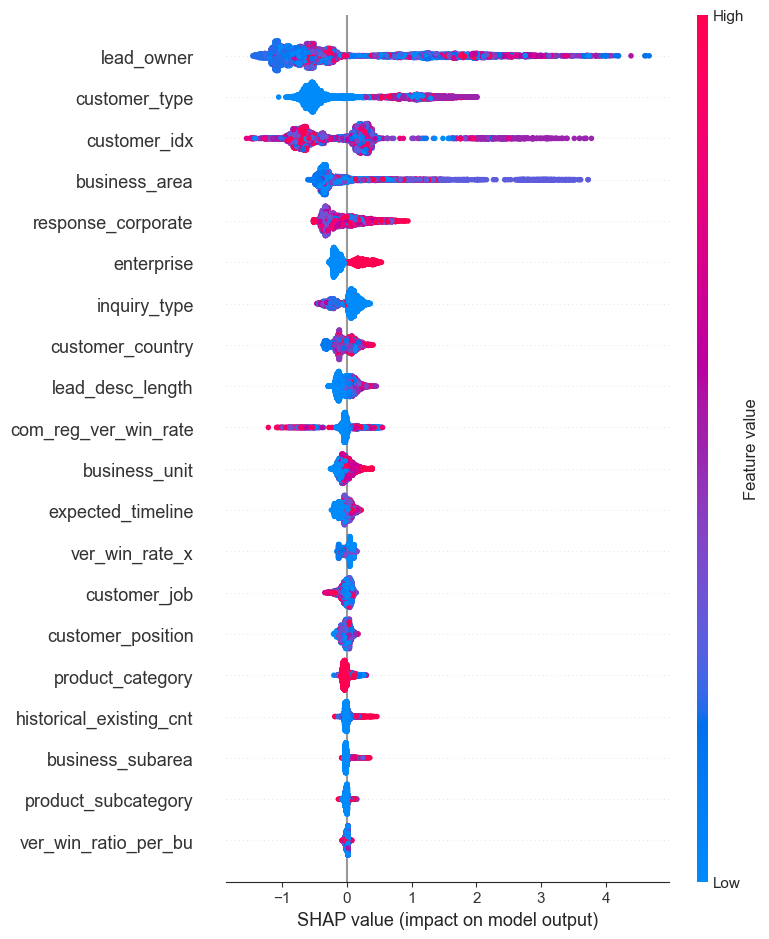

In [132]:
import shap

# SHAP 값을 계산하기 위해 TreeExplainer 객체를 생성합니다.
explainer = shap.TreeExplainer(model)

# SHAP 값을 계산합니다.
shap_values = explainer.shap_values(X_val)

# 각 특성의 SHAP 값을 출력합니다.
shap.summary_plot(shap_values, X_val)